In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [13]:
employee_data = pd.read_csv('employee-attrition.csv',sep='\t')

In [15]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [16]:
employee_data[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Attrition']].describe()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,2,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No,No
freq,1043,961,606,882,326,673,1054,1233


In [17]:
# Count number of occurrences and calculate proportions
counts = employee_data['Attrition'].value_counts()
AtrritonRate = counts[1] / len(employee_data)

print("Atrriton Rate: ",round(AtrritonRate,4)*100)

Atrriton Rate:  16.12


In [18]:
employee_data['Gender'] = employee_data['Gender'].replace({'Male': 1, 'Female': 0})
employee_data['OverTime'] = employee_data['OverTime'].replace({'Yes': 1, 'No': 0})
employee_data['Attrition'] = employee_data['Attrition'].replace({'Yes': 1, 'No': 0})

In [19]:
employee_data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [20]:
employee_data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [21]:
employee_data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [22]:
employee_data = pd.get_dummies(employee_data, columns=['BusinessTravel','Department','MaritalStatus'])

In [23]:
employee_data

,Age,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5,1,0,0,1,0,0,1,0,0,1
1,49,279,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7,0,0,1,0,0,1,0,0,1,0
2,37,1373,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,33,1392,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0,0,0,1,0,0,1,0,0,1,0
4,27,591,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,2571,12290,4,Y,0,17,3,3,80,1,17,3,3,5,2,0,3,0,0,1,0,0,1,0,0,1,0
1466,39,613,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,9991,21457,4,Y,0,15,3,1,80,1,9,5,3,7,7,1,7,0,0,0,1,0,1,0,0,1,0
1467,27,155,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,6142,5174,1,Y,1,20,4,2,80,1,6,0,3,6,2,0,3,0,0,0,1,0,1,0,0,1,0
1468,49,1023,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,5390,13243,2,Y,0,14,3,4,80,0,17,3,2,9,6,0,8,0,0,1,0,0,0,1,0,1,0


In [24]:
employee_data.drop(['BusinessTravel_Non-Travel','Department_Human Resources','MaritalStatus_Divorced'],axis=1,inplace=True)

In [25]:
employee_data.describe().loc[['mean', 'max', 'min'], :]

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
mean,36.92381,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,0.6,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.79932,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224,0.188435,0.709524,0.653741,0.303401,0.457823,0.319728
max,60.00000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,1.0,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.00000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
min,18.00000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.0,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
employee_data.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

In [47]:
Target = employee_data.pop('Attrition')
employee_data.insert(len(employee_data.columns), 'Attrition', Target)

In [36]:
def regularized_mean_encoding(df,column,alpha):

    # calculate global mean of target variable
    global_mean = df['Attrition'].mean()

    # calculate encoded values for each category
    encoded_values = {}
    for category in df[column].unique():
        # calculate size of category and mean of target variable for that category
        category_size = df[df[column] == category].shape[0]
        category_mean = df[df[column] == category]['Attrition'].mean()

        # calculate regularized mean for the category
        reg_mean = ((category_mean * category_size) + (global_mean * alpha)) / (category_size + alpha)

        # store the encoded value for the category
        encoded_values[category] = reg_mean

    # replace original values with encoded values in the dataframe
    df[column] = df[column].map(encoded_values)

    return df


In [39]:
employee_data = regularized_mean_encoding(employee_data,'EducationField',1)
employee_data = regularized_mean_encoding(employee_data,'JobRole',1)

In [48]:
employee_data

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,41,1102,1,2,0.146888,2,0,94,3,2,0.174805,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,0,1,1
1,49,279,8,1,0.146888,3,1,61,2,2,0.160960,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0
2,37,1373,2,2,0.134473,4,1,92,2,1,0.239082,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,1,1
3,33,1392,3,4,0.146888,4,0,56,3,1,0.160960,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0
4,27,591,2,1,0.135831,1,1,40,3,1,0.239082,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,0.135831,3,1,41,4,2,0.239082,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,1,0,1,0,1,0,0
1466,39,613,6,1,0.135831,4,1,42,2,3,0.069403,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,1,1,0,1,0,0
1467,27,155,4,3,0.146888,2,1,87,4,2,0.069597,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,1,1,0,1,0,0
1468,49,1023,2,3,0.135831,4,1,63,2,2,0.174805,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,1,0,0,1,1,0,0


In [49]:
# Split the dataset into training and testing datasets
train, test = train_test_split(employee_data,
                                   test_size=0.2,
                                   stratify=employee_data['Attrition'],
                                   random_state=42)

In [50]:
train

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,Attrition
1194,47,1225,2,4,0.146888,2,0,47,4,4,0.050109,2,15972,21086,6,0,14,3,3,3,29,2,3,3,2,1,2,0,1,0,1,0,0,0
128,22,594,2,1,0.241814,3,1,100,3,1,0.239082,4,2523,19299,0,0,14,3,3,1,3,2,3,2,1,2,1,0,1,1,0,1,0,0
810,46,406,3,1,0.219758,1,1,52,3,4,0.050109,3,17465,15596,3,0,12,3,4,1,23,3,3,12,9,4,9,0,1,0,1,1,0,0
478,25,622,13,1,0.135831,2,1,40,3,1,0.394776,3,2096,26376,1,0,11,3,3,0,7,1,3,7,4,0,6,0,1,0,1,1,0,0
491,43,1001,9,5,0.135831,4,1,72,3,2,0.239082,3,5679,19627,3,1,13,3,2,1,10,3,3,8,7,4,7,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,23,427,7,3,0.146888,3,1,99,3,1,0.394776,4,2275,25103,1,1,21,4,2,1,3,2,3,3,2,0,2,0,1,0,1,0,0,1
963,38,1009,2,2,0.146888,2,0,31,3,2,0.174805,1,6893,19461,3,0,15,3,4,1,11,3,3,7,7,1,7,0,1,0,1,0,0,0
734,22,217,8,1,0.146888,2,1,94,1,1,0.239082,1,2451,6881,1,0,15,3,1,1,4,3,2,4,3,1,1,0,1,1,0,1,0,0
1315,36,430,2,4,0.134473,4,0,73,3,2,0.160960,2,6962,19573,4,1,22,4,4,1,15,2,3,1,0,0,0,0,1,1,0,1,0,0


In [51]:
corr_mtx = train.corr(method='spearman',numeric_only='True')

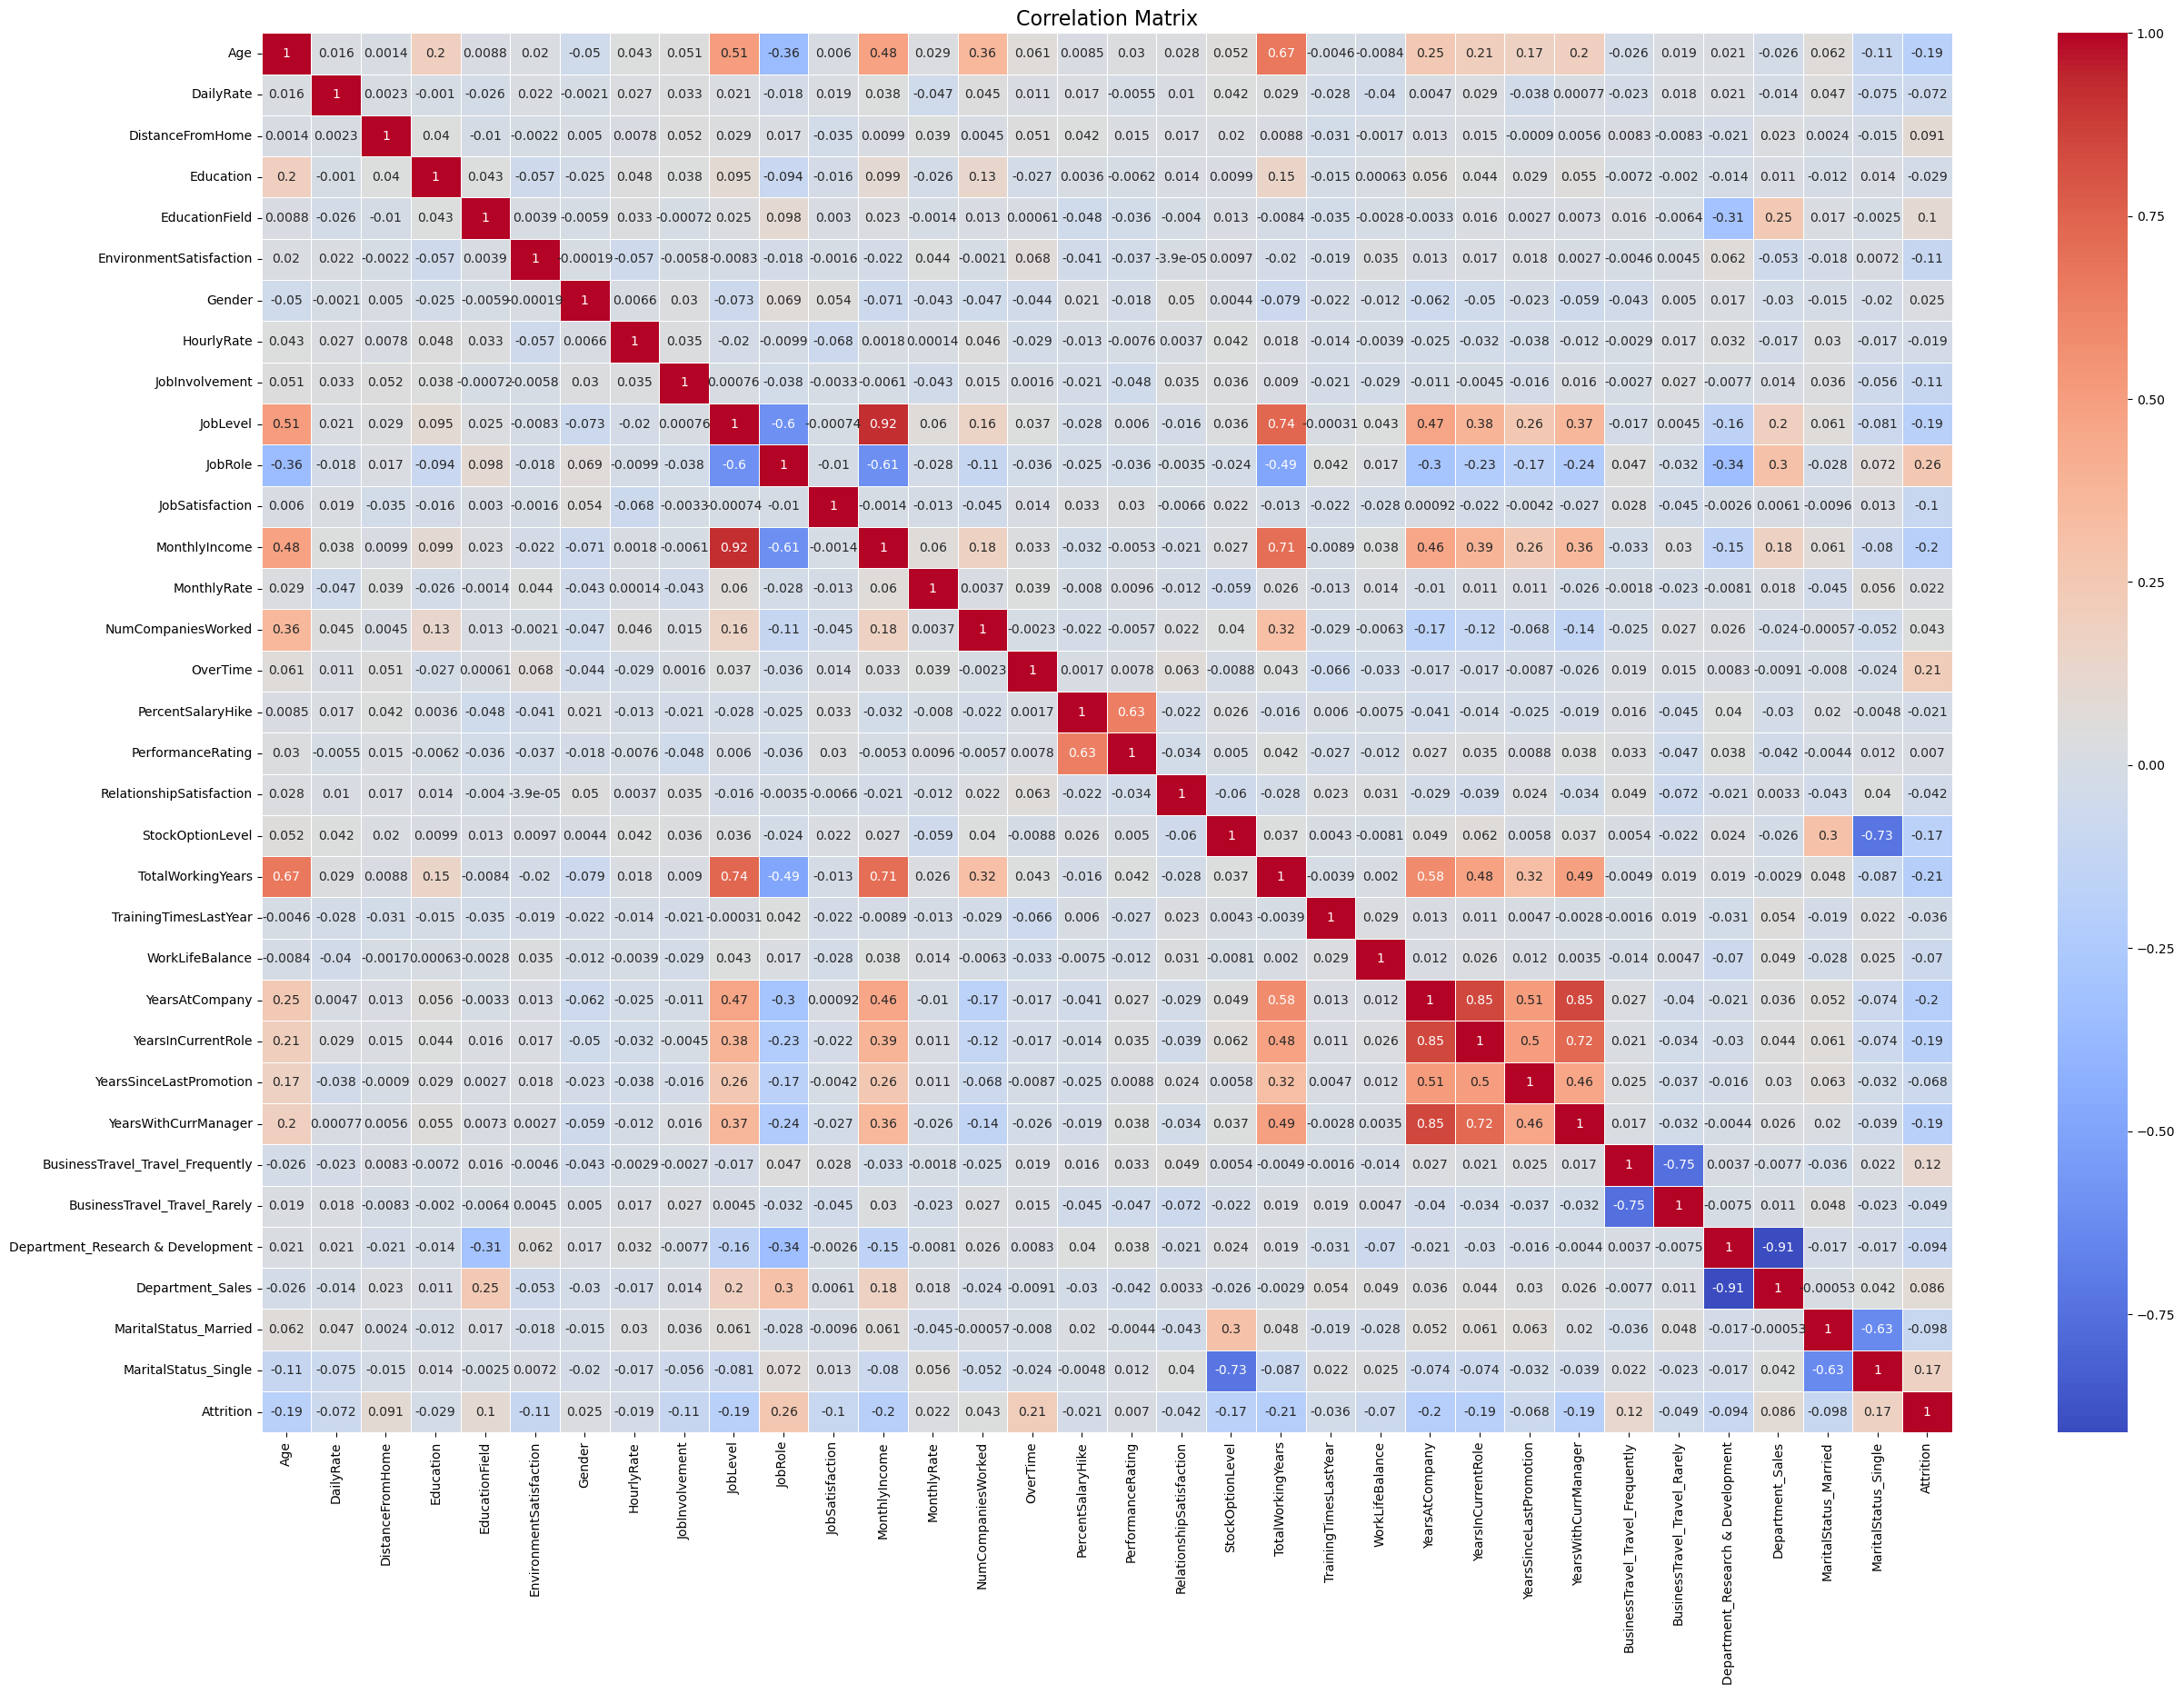

In [52]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(30, 20))

# Create the heatmap using seaborn
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)

# Add a title to the plot
ax.set_title('Correlation Matrix', fontsize=16)

# Rotate the tick labels for easier reading
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [57]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.feature_selection import f_classif

# Generate a random dataset with 5 features and a target variable
X, y = make_classification(n_samples=100, n_features=5, random_state=42)

# Create a DataFrame from the dataset
df = pd.DataFrame(X, columns=['feat1', 'feat2', 'feat3', 'feat4', 'feat5'])
df['target'] = y

# Calculate the ANOVA F-values and p-values for each feature
f_values, p_values = f_classif(df.drop('target', axis=1), df['target'])

# Create a matrix of ANOVA F-values and corresponding p-values in a DataFrame
anova_matrix = pd.DataFrame({'F-value': f_values, 'p-value': p_values}, index=df.columns[:-1])

# Display the matrix
print(anova_matrix)

          F-value       p-value
feat1    4.177104  4.365670e-02
feat2  136.925481  2.593510e-20
feat3    1.163711  2.833453e-01
feat4  290.677311  4.436733e-31
feat5    0.460023  4.992115e-01


In [56]:
df_selected

,feature_9,feature_10,feature_11,feature_13,feature_18,target
0,-1.219417,1.290764,2.961265,2.007573,-0.875058,1
1,1.199322,-0.714709,0.655303,1.989764,-0.978686,0
2,1.331789,1.914748,0.363854,1.527809,-1.693740,1
3,0.082747,-1.751222,1.626956,1.970248,-0.604178,0
4,0.319787,1.616093,1.221082,0.283424,0.334629,0
...,...,...,...,...,...,...
995,0.620435,0.788676,0.764075,1.464908,-1.654945,0
996,1.367129,-0.988020,0.491495,2.263044,-1.040102,0
997,1.661039,0.869749,1.386556,2.615030,-1.055949,0
998,1.182974,0.884495,0.894399,2.116853,-1.336125,0


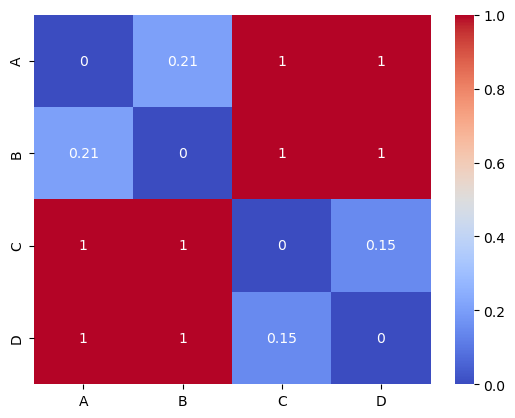

In [50]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Create example data
data = {'A': ['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no'],
        'B': ['A', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
        'C': ['high', 'low', 'low', 'high', 'low', 'high', 'low', 'low', 'high', 'low'],
        'D': ['up', 'down', 'down', 'up', 'up', 'up', 'down', 'down', 'up', 'up']}

df = pd.DataFrame(data)

# Create matrix for storing p-values
p_values = pd.DataFrame(columns=df.columns, index=df.columns)

# Calculate chi-square tests and store p-values
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i >= j:
            continue
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        p_values.loc[col1, col2] = p
        p_values.loc[col2, col1] = p

#Set diagonal values to 0
np.fill_diagonal(p_values.values, 0)

# Create heatmap using seaborn
sns.heatmap(p_values.astype(float), cmap='coolwarm', annot=True, vmin=0, vmax=1)

# Show plot
plt.show()

In [43]:
import pandas as pd
import scipy.stats as stats

# Create example data
data = {'var1': [1, 2, 3, 4, 5], 
        'var2': [1, 1, 2, 2, 2], 
        'var3': [1, 1, 1, 2, 2],
        'var4': [2, 2, 2, 2, 1]}
df = pd.DataFrame(data)

# Create matrix for storing p-values
p_values = pd.DataFrame(columns=df.columns, index=df.columns)

# Calculate chi-square tests and store p-values
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i == j:
            p_values.loc[col1, col2] = 1.0
        elif i < j:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
            p_values.loc[col1, col2] = p
            p_values.loc[col2, col1] = p

# Print matrix of p-values
print(p_values)

          var1      var2      var3      var4
var1       1.0  0.287297  0.287297  0.287297
var2  0.287297       1.0   0.57615       1.0
var3  0.287297   0.57615       1.0  0.819477
var4  0.287297       1.0  0.819477       1.0


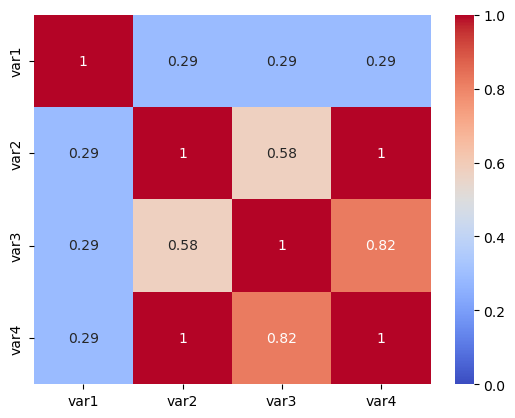

In [44]:
# Create heatmap using seaborn
sns.heatmap(p_values.astype(float), cmap='coolwarm', annot=True, vmin=0, vmax=1)

# Show plot
plt.show()

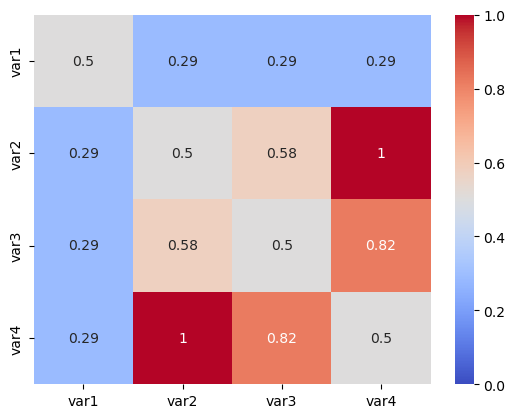

In [42]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Create example data
data = {'var1': [1, 2, 3, 4, 5], 
        'var2': [1, 1, 2, 2, 2], 
        'var3': [1, 1, 1, 2, 2],
        'var4': [2, 2, 2, 2, 1]}
df = pd.DataFrame(data)

# Create matrix for storing p-values
p_values = pd.DataFrame(columns=df.columns, index=df.columns)

# Calculate chi-square tests and store p-values
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i >= j:
            continue
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        p_values.loc[col1, col2] = p
        p_values.loc[col2, col1] = p

# Fill any remaining NaN values with 0.5
p_values.fillna(0.5, inplace=True)

# Create heatmap using seaborn
sns.heatmap(p_values.astype(float), cmap='coolwarm', annot=True, vmin=0, vmax=1)

# Show plot
plt.show()